# Exploring Texas Execution Data

# Setup

In [1]:
import matplotlib.pyplot as plt  
import matplotlib
import seaborn as sns
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [4]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [1]:
import pyLDAvis

# Import

In [193]:
df = pd.read_csv("data/Death_Row_Data.csv", encoding = "latin1")

In [194]:
print(len(df))
df.sample(5)

549


,Last Statement,Last Name,First Name,TDCJ Num,Age,Date,Race,County
244,Tell Mama I love her and tell the kids I love ...,Johnson,Kia,999139,38,06/11/2003,Black,Bexar
506,NaN,Cordova,Joe,730,39,01/22/1992,Hispanic,Harris
332,"I would like to take this time to, ah, to use ...",Clayton,James,921,33,05/25/2000,Black,Taylor
330,I understand that Michael Skains is supposed ...,Mason,Thomas,999035,48,06/12/2000,White,Smith
526,"Mother, I am sorry for all the pain Iâve cau...",Williams,Anthony,619,27,05/28/1987,Black,Harris


# Look at year vs count

In [196]:
years = []
for i in range(len(df.Date)):
    a = df.Date[i][-4:]
    years.append(a)

In [197]:
df["year"] = years

In [198]:
df_count = df.groupby(['year']).count()

In [199]:
df_counts.head()

,year,count
0,1982,1
1,1984,2
2,1985,5
3,1986,7
4,1987,1


In [200]:
df_count.reset_index(inplace=True)

In [201]:
df_counts = df_count[['year','Last Statement']]

In [202]:
df_counts.rename(columns={'Last Statement': 'count'}, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [203]:
df_counts.to_csv('count_by_year.csv')

In [204]:
df_counts[['year']] = df_counts[['year']].astype(int)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [205]:
lr1 = LinearRegression()

X = df_counts[['year']]
y = df_counts['count']

lr1.fit(X,y)

lr1.score(X,y)

0.14853821563368308

In [206]:
degree = 3

est = make_pipeline(PolynomialFeatures(degree), LinearRegression())

est.fit(X, y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

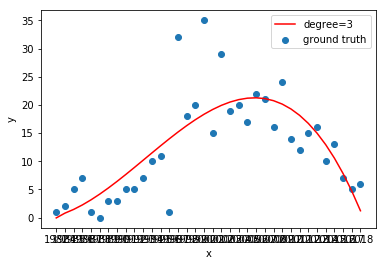

In [207]:
fig,ax = plt.subplots(1,1);
ax.scatter(X, y,label='ground truth')
ax.plot(X, est.predict(X), color='red',label='degree=%d' % degree)
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend(loc='upper right',frameon=True)

# Sentiment of last words

In [211]:
df.head()
df = df.rename(columns={"Last Statement": "last_statement"})

In [212]:
df.head()

,last_statement,Last Name,First Name,TDCJ Num,Age,Date,Race,County,year
0,To everyone that has been there for me you kno...,Castillo,Juan,999502,37,5/16/2018,Hispanic,Bexar,2018
1,"Yes, I would like to say nephew it burns huh. ...",Davila,Erick,999545,31,4/25/2018,Black,Tarrant,2018
2,First I would like to say I have been here si...,"Rodriguez, III",Rosendo,999534,38,3/27/2018,Histpanic,Lubbock,2018
3,"No, Well, Hi Mary Jean. See yâall later. Go ...",Battaglia,John,999412,62,2/1/2018,White,Dallas,2018
4,First I would like to praise my Lord Jesus Ch...,Rayford,William,999371,64,1/30/2018,Black,Dallas,2018


In [213]:
from textblob import TextBlob

In [214]:
polarity = []
subjectivity = []

for i in range(len(df.last_statement)):
    state = str(df.last_statement[i])
    a = list(TextBlob(state).sentiment)
    polarity.append(a[0])
    subjectivity.append(a[1])

In [215]:
len(subjectivity)

549

In [216]:
df['polarity'] = polarity
df['subjectivity'] = subjectivity

(-1, 1)

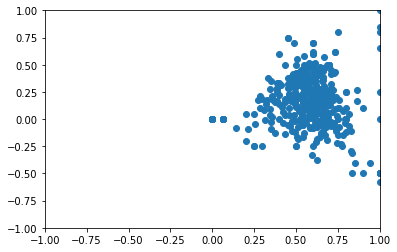

In [222]:
fig,ax = plt.subplots(1,1);
ax.scatter(subjectivity,polarity)

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

# Race

In [23]:
for i in range(0,len(df)):
    race = df["Race"].iloc[i]
    if race == "White ":
        df["Race"].iloc[i] = "White"
    elif race == "Hispanic ":
        df["Race"].iloc[i] = "Hispanic"
    elif race == "Histpanic":
        df["Race"].iloc[i] = "Hispanic"
    else:
        pass
    
races = df["Race"].unique()
print (races)

['Hispanic' 'Black' 'White' 'Other']


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


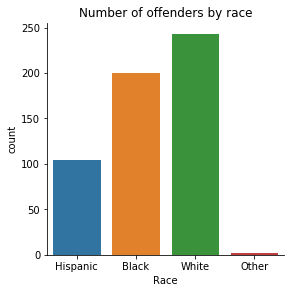

In [24]:
sns.factorplot('Race',data=df,kind='count')
plt.title("Number of offenders by race")
plt.show()